# Getting started with gaze dataset 

In this example, we will show examples of the main functionalities included in the emtk.

This includes:
- Parsing raw data from the gaze dataset to pandas dataframe.
- Visualizing raw data, filtered fixation, saccades, and AOIs visualization.
- Applying fixation correction through setting offset.
- Generating AOIs for any gaze stimuli.
- Adding text tokens to generated AOIs.
- Adding srcML tags to AOIs and tokens.
- Performing hit test between fixations and AOIs. 

In [3]:
%load_ext autoreload
%autoreload 2  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing the tool

In [2]:
import pandas as pd
from gstk import parsers, visualization, util, aoi

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Parsing raw data from the UNL dataset

In [3]:
eye_events, samples = parsers.UNL_UM(sample_size = 50)

Processing files:   2%|▎         | 1/40 [00:01<01:00,  1.56s/file]

Processed file: UNL-UM_UO Recording10.tsv


Processing files:   5%|▌         | 2/40 [00:04<01:21,  2.14s/file]

Processed file: UNL-UM_UO Recording11.tsv


Processing files:   8%|▊         | 3/40 [00:06<01:29,  2.42s/file]

Processed file: UNL-UM_UO Recording12.tsv


Processing files:  10%|█         | 4/40 [00:10<01:49,  3.03s/file]

Processed file: UNL-UM_UO Recording13.tsv


Processing files:  12%|█▎        | 5/40 [00:15<02:08,  3.66s/file]

Processed file: UNL-UM_UO Recording14.tsv


Processing files:  15%|█▌        | 6/40 [00:20<02:17,  4.05s/file]

Processed file: UNL-UM_UO Recording15.tsv


Processing files:  20%|██        | 8/40 [00:26<01:40,  3.15s/file]

Processed file: UNL-UM_UO Recording16.tsv
Stimuli not found in the file: UNL-UM_UO Recording17.tsv
Stimuli not found in the file: UNL-UM_UO Recording18.tsv


Processing files:  25%|██▌       | 10/40 [00:32<01:37,  3.26s/file]

Processed file: UNL-UM_UO Recording19.tsv


Processing files:  28%|██▊       | 11/40 [00:39<02:00,  4.15s/file]

Processed file: UNL-UM_UO Recording20.tsv


Processing files:  30%|███       | 12/40 [00:47<02:22,  5.10s/file]

Processed file: UNL-UM_UO Recording21.tsv


Processing files:  32%|███▎      | 13/40 [00:55<02:38,  5.86s/file]

Processed file: UNL-UM_UO Recording22.tsv


Processing files:  35%|███▌      | 14/40 [01:03<02:50,  6.55s/file]

Processed file: UNL-UM_UO Recording23.tsv


Processing files:  38%|███▊      | 15/40 [01:12<03:03,  7.36s/file]

Processed file: UNL-UM_UO Recording24.tsv


Processing files:  40%|████      | 16/40 [01:23<03:18,  8.29s/file]

Processed file: UNL-UM_UO Recording25.tsv


Processing files:  42%|████▎     | 17/40 [01:33<03:25,  8.91s/file]

Processed file: UNL-UM_UO Recording26.tsv


Processing files:  45%|████▌     | 18/40 [01:44<03:27,  9.41s/file]

Processed file: UNL-UM_UO Recording27.tsv


Processing files:  48%|████▊     | 19/40 [01:55<03:28,  9.93s/file]

Processed file: UNL-UM_UO Recording28.tsv


Processing files:  50%|█████     | 20/40 [02:08<03:33, 10.66s/file]

Processed file: UNL-UM_UO Recording29.tsv


Processing files:  52%|█████▎    | 21/40 [02:21<03:36, 11.37s/file]

Processed file: UNL-UM_UO Recording3.tsv


Processing files:  55%|█████▌    | 22/40 [02:33<03:32, 11.78s/file]

Processed file: UNL-UM_UO Recording30.tsv


Processing files:  57%|█████▊    | 23/40 [02:47<03:31, 12.46s/file]

Processed file: UNL-UM_UO Recording31.tsv


Processing files:  60%|██████    | 24/40 [03:01<03:26, 12.92s/file]

Processed file: UNL-UM_UO Recording32.tsv


Processing files:  62%|██████▎   | 25/40 [03:15<03:18, 13.26s/file]

Processed file: UNL-UM_UO Recording33.tsv


Processing files:  65%|██████▌   | 26/40 [03:30<03:12, 13.72s/file]

Processed file: UNL-UM_UO Recording34.tsv


Processing files:  68%|██████▊   | 27/40 [03:46<03:05, 14.28s/file]

Processed file: UNL-UM_UO Recording35.tsv


Processing files:  70%|███████   | 28/40 [04:01<02:55, 14.61s/file]

Processed file: UNL-UM_UO Recording36.tsv


Processing files:  72%|███████▎  | 29/40 [04:17<02:45, 15.06s/file]

Processed file: UNL-UM_UO Recording37.tsv


Processing files:  75%|███████▌  | 30/40 [04:33<02:33, 15.36s/file]

Processed file: UNL-UM_UO Recording38.tsv


Processing files:  78%|███████▊  | 31/40 [04:50<02:21, 15.77s/file]

Processed file: UNL-UM_UO Recording39.tsv


Processing files:  80%|████████  | 32/40 [05:08<02:10, 16.36s/file]

Processed file: UNL-UM_UO Recording4.tsv


Processing files:  82%|████████▎ | 33/40 [05:26<01:58, 16.90s/file]

Processed file: UNL-UM_UO Recording40.tsv


Processing files:  85%|████████▌ | 34/40 [05:44<01:43, 17.30s/file]

Processed file: UNL-UM_UO Recording41.tsv


Processing files:  88%|████████▊ | 35/40 [06:03<01:29, 17.84s/file]

Processed file: UNL-UM_UO Recording42.tsv


Processing files:  90%|█████████ | 36/40 [06:22<01:12, 18.17s/file]

Processed file: UNL-UM_UO Recording43.tsv


Processing files:  95%|█████████▌| 38/40 [06:43<00:26, 13.31s/file]

Processed file: UNL-UM_UO Recording5.tsv
Stimuli not found in the file: UNL-UM_UO Recording6.tsv


Processing files:  98%|█████████▊| 39/40 [07:04<00:15, 15.62s/file]

Processed file: UNL-UM_UO Recording7.tsv


Processing files: 100%|██████████| 40/40 [07:26<00:00, 11.16s/file]

Processed file: UNL-UM_UO Recording8.tsv


In [4]:
samples.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,Recording timestamp,Project name,Export date,...,Presented Media name,Presented Media width,Presented Media height,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Eye movement type,Gaze event duration,Eye movement type index
0,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q3,gstk/datasets/UNL_UM24/stimuli,Q3 (localhost).png,223219704,UNL-UM_UO,2025/2/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,200.0,415.0
1,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q3,gstk/datasets/UNL_UM24/stimuli,Q3 (localhost).png,223226361,UNL-UM_UO,2025/2/2,...,ProLabQs Recording10.mp4,1920.0,1080.0,0.0,0.0,1920.0,1080.0,Fixation,200.0,415.0
2,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q3,gstk/datasets/UNL_UM24/stimuli,Q3 (localhost).png,223229137,UNL-UM_UO,2025/2/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fixation,200.0,415.0
3,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q3,gstk/datasets/UNL_UM24/stimuli,Q3 (localhost).png,223234695,UNL-UM_UO,2025/2/2,...,ProLabQs Recording10.mp4,1920.0,1080.0,0.0,0.0,1920.0,1080.0,Fixation,200.0,415.0
4,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q3,gstk/datasets/UNL_UM24/stimuli,Q3 (localhost).png,223243028,UNL-UM_UO,2025/2/2,...,ProLabQs Recording10.mp4,1920.0,1080.0,0.0,0.0,1920.0,1080.0,Fixation,200.0,415.0


In [5]:
eye_events.head()

,eye_tracker,experiment_id,participant_id,filename,trial_id,stimuli_module,stimuli_name,timestamp,duration,x0,y0,x1,y1,token,pupil_l,pupil_r,amplitude,peak_velocity,eye_event_type
0,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q3,gstk/datasets/UNL_UM24/stimuli,Q3 (localhost).png,223219704,200.0,960.0,527.0,NaN,NaN,None,NaN,NaN,NaN,NaN,fixation
1,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q3,gstk/datasets/UNL_UM24/stimuli,Q3 (localhost).png,223226361,200.0,960.0,527.0,NaN,NaN,None,3.022,3.008,NaN,NaN,fixation
2,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q3,gstk/datasets/UNL_UM24/stimuli,Q3 (localhost).png,223229137,200.0,960.0,527.0,NaN,NaN,None,NaN,NaN,NaN,NaN,fixation
3,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q3,gstk/datasets/UNL_UM24/stimuli,Q3 (localhost).png,223234695,200.0,960.0,527.0,NaN,NaN,None,3.026,3.006,NaN,NaN,fixation
4,Tobii I-VT (Fixation),31424792_P195,31424792_P195,UNL-UM_UO Recording10.tsv,Q3,gstk/datasets/UNL_UM24/stimuli,Q3 (localhost).png,223243028,200.0,960.0,527.0,NaN,NaN,None,3.023,3.007,NaN,NaN,fixation


In [37]:
# save the data
samples.to_csv('samples.csv', index = False)
eye_events.to_csv('eye_events.csv', index = False)

In [6]:
unique_experiment_ids_samples = samples['experiment_id'].unique()
unique_experiment_ids_samples

array(['31424792_P195', '28464710_P127', '8953417_P157', '98138536_P139',
       '86625353_P231', '68288415_P155', '48914592_P143', '2128416_P262',
       '35630584_P170', '82886310_P266', '52450561_P256', '19942717_P152',
       '93748365_P160', '87467712_P149', '92561849_P224', '37714676_P202',
       '67744331_P194', '67306020_P250', 'Pilot001', '37314099_P255',
       '26355477_P124', '15120427_P253', '14117440_P181', '78499485_P257',
       '79664715_P254', '6103787_P198', '22713769_P252', '67020883_P243',
       '53504980_P154', 'Pilot02', '17623623_P103', '17281517_P247',
       '65560620_P246', '67006224_P140', '50508067_P135', '25899018_P174',
       '57466117_P142'], dtype=object)

In [7]:
unique_experiment_ids_eye_events = eye_events["experiment_id"].unique()
unique_experiment_ids_eye_events            

array(['31424792_P195', '28464710_P127', '8953417_P157', '98138536_P139',
       '86625353_P231', '68288415_P155', '48914592_P143', '2128416_P262',
       '35630584_P170', '82886310_P266', '52450561_P256', '19942717_P152',
       '93748365_P160', '87467712_P149', '92561849_P224', '37714676_P202',
       '67744331_P194', '67306020_P250', 'Pilot001', '37314099_P255',
       '26355477_P124', '15120427_P253', '14117440_P181', '78499485_P257',
       '79664715_P254', '6103787_P198', '22713769_P252', '67020883_P243',
       '53504980_P154', 'Pilot02', '17623623_P103', '17281517_P247',
       '65560620_P246', '67006224_P140', '50508067_P135', '25899018_P174',
       '57466117_P142'], dtype=object)

# Visualization

### For Individual

In [6]:
experiment_id = "28464710_P127"
trial_id = 'Q5'

### Draw Fixations

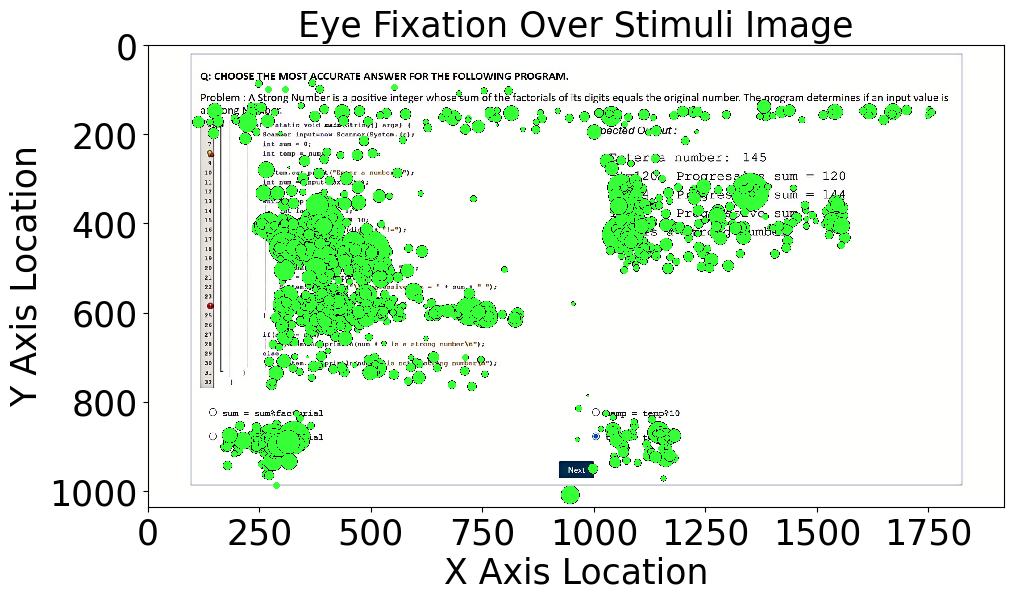

In [7]:
trial_data = eye_events.loc[(eye_events['experiment_id'] == experiment_id) & 
                            (eye_events['trial_id'] == trial_id)]

samples_data = samples.loc[(samples['experiment_id'] == experiment_id) & 
                            (samples['trial_id'] == trial_id)]

# save trial data
trial_data.to_csv('trial_data.csv', index=False)
samples_data.to_csv('samples_data.csv', index=False)

visualization.draw_trial(trial_data, samples_data, 
                         draw_raw_data=False, draw_fixation=True,
                        draw_saccade=False, draw_aoi=False, 
                        sample_x_col="Gaze point X [DACS px]",
                        sample_y_col="Gaze point Y [DACS px]")

### For group

In [8]:
trial_id = 'Q5'

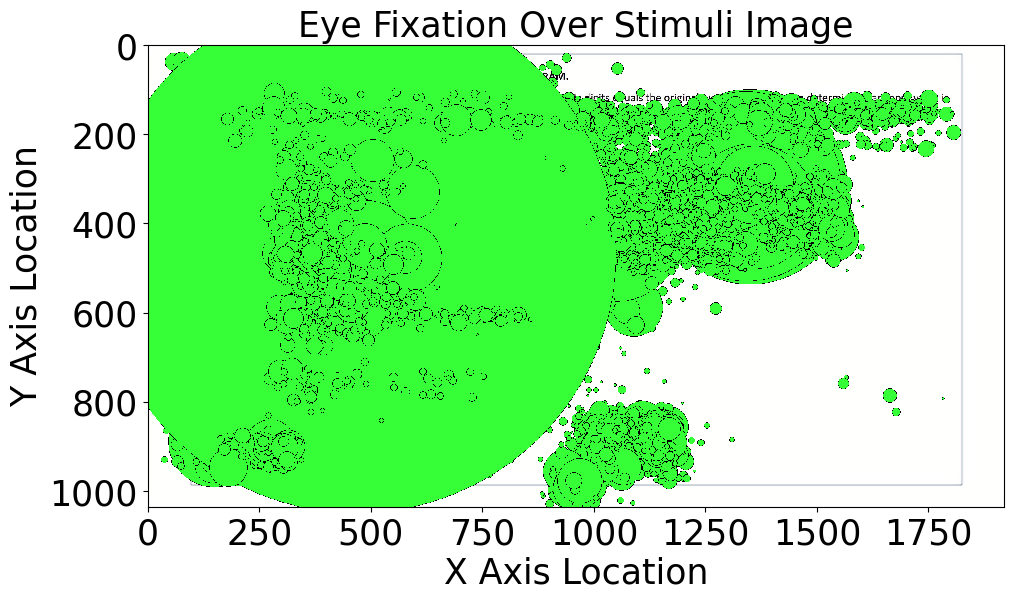

In [9]:
trial_data = eye_events.loc[eye_events['trial_id'] == trial_id]

samples_data = samples.loc[samples['trial_id'] == trial_id]

# save trial data
# trial_data.to_csv('trial_data.csv', index=False)

visualization.draw_trial(trial_data, samples_data, 
                         draw_raw_data=False, draw_fixation=True,
                        draw_saccade=False, draw_aoi=False, 
                        sample_x_col="Gaze point X [DACS px]",
                        sample_y_col="Gaze point Y [DACS px]")

# Heatmap

### Individual

In [10]:
experiment_id = "28464710_P127"
trial_id = 'Q5'

### Draw Individual Heatmap

In [11]:
# load the data
# clearn the data
trial_data = pd.DataFrame()
trial_data = eye_events.loc[(eye_events['experiment_id'] == experiment_id) & 
                            (eye_events['trial_id'] == trial_id)]

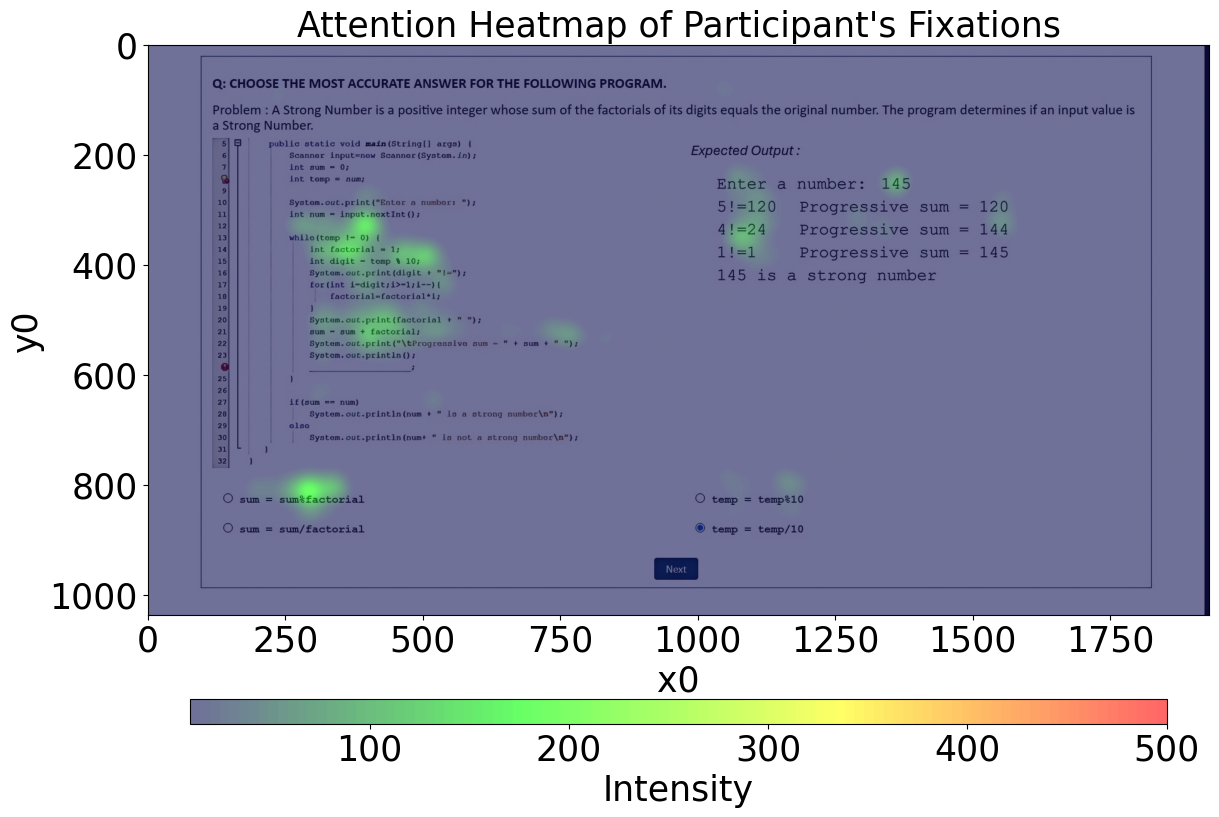

In [12]:
visualization.draw_heatmap(trial_data,contours=False,figsize=(18, 10), alpha=0.6, sigma_value=17, vmin=10, vmax=500)

In [13]:
trial_id = 'Q5'

In [14]:
trial_data = pd.DataFrame()
trial_data = eye_events.loc[eye_events['trial_id'] == trial_id]


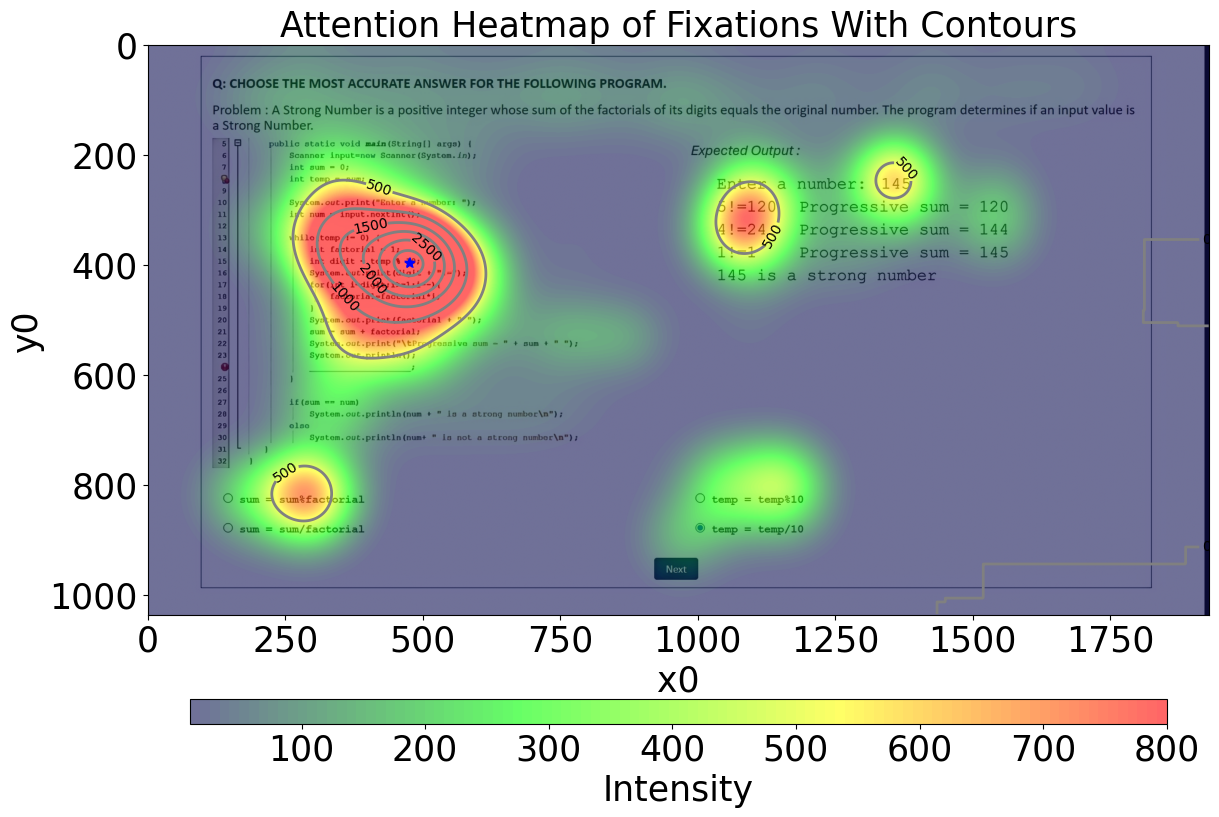

In [78]:
visualization.draw_heatmap(trial_data,contours=True,figsize=(18, 10),
                           alpha=0.6, sigma_value=50, vmin=10, vmax=800)

# Features Extraction

In [31]:
experiment_range = pd.Series(unique_experiment_ids_eye_events)
trial_id = 'Q2B'

# Fixation Result Export

In [32]:
# add progress bar
from tqdm import tqdm
import os

tqdm.pandas()

for experiment_id in tqdm(experiment_range, desc="Processing experiment_id", colour="green"):
    trial_data = eye_events.loc[(eye_events['experiment_id'] == experiment_id) & 
                                (eye_events['trial_id'] == trial_id)]

    samples_data = samples.loc[(samples['experiment_id'] == experiment_id) & 
                                (samples['trial_id'] == trial_id)]
    
    if trial_data.empty:
        print(f"Eye event dataframe is empty for experiment_id {experiment_id} and trial_id {trial_id}")
        continue
    
    fixations = trial_data.loc[(trial_data['eye_event_type'] == 'fixation')]
    
    # Create directory if it does not exist
    output_dir = f'output/unl_um/fixations/{experiment_id}'
    os.makedirs(output_dir, exist_ok=True)
    
    # Export the sorted DataFrame to a CSV file
    fixations.to_csv(f'gstk/output/unl_um/fixations/{trial_id}/fixations_{trial_id}_{experiment_id}.csv', index=False, header=True)

Processing experiment_id: 100%|██████████| 37/37 [00:18<00:00,  1.95it/s]


# AOIs Detector

In [40]:
import cv2
import pytesseract
import pandas as pd
import numpy as np
from pytesseract import Output
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")


In [43]:
trial_id = 'Q1'

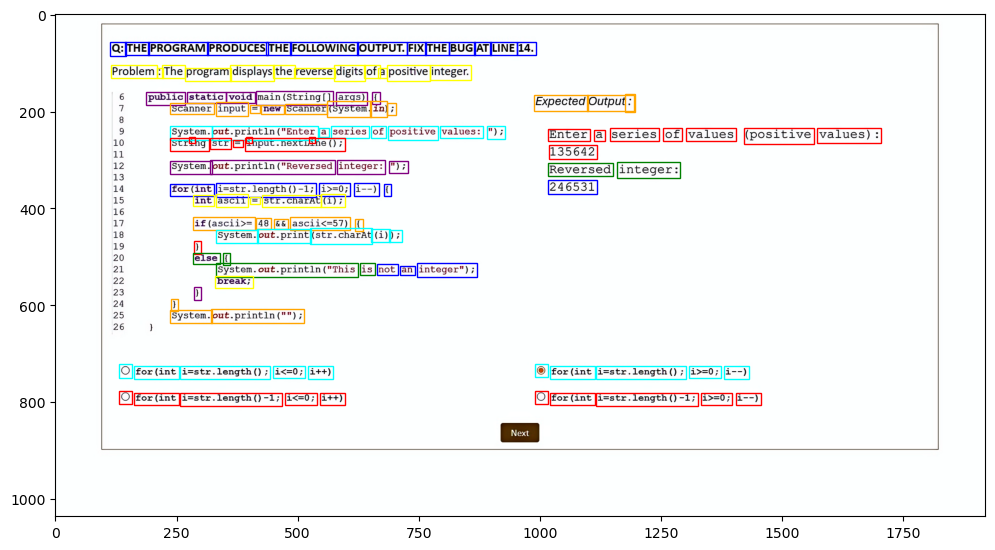

         kind             name     x    y  width  height              token  \
0    sub-line    line 2 part 1   118   62     23      19                 Q:   
1    sub-line    line 2 part 2   148   62     41      16                THE   
2    sub-line    line 2 part 3   197   62    112      16            PROGRAM   
3    sub-line    line 2 part 4   318   62    115      16           PRODUCES   
4    sub-line    line 2 part 5   440   62     41      16                THE   
..        ...              ...   ...  ...    ...     ...                ...   
120  sub-line   line 21 part 6   995  781     17      17                  O   
121  sub-line   line 21 part 7  1025  785     83      16            for(int   
122  sub-line   line 21 part 8  1121  785    200      17  i=str.length()-1;   
123  sub-line   line 21 part 9  1337  785     55      15              i>=0;   
124  sub-line  line 21 part 10  1409  785     42      16               i--)   

                                                 im

In [45]:
def preprocess_image(image, enhance_contrast=True, apply_morphology=True):
    """Preprocess the image for better OCR detection."""
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)

    if enhance_contrast:
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        gray = clahe.apply(gray)

    adaptive_binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 8
    )

    _, binary = cv2.threshold(adaptive_binary, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    if apply_morphology:
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
        morphed = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    else:
        morphed = binary.copy()

    return binary, morphed

def detect_text_with_tesseract(image_path, scale_factor=2, debug=False, 
                               use_preprocessing=True, min_confidence=60,
                               psm="6", oem="3"):
    """Detect text using Tesseract OCR with proper scaling adjustments."""

    # Load image using PIL
    image = Image.open(image_path)

    # Scale image for better OCR accuracy
    image_scaled = image.resize(
        (int(image.width * scale_factor), int(image.height * scale_factor)), 
        Image.Resampling.LANCZOS
    )

    # Preprocess image if needed
    if use_preprocessing:
        _, ocr_image = preprocess_image(image_scaled)
    else:
        ocr_image = image_scaled

    # Run Tesseract OCR on scaled image
    config = f"--psm {psm} --oem {oem}"
    ocr_data = pytesseract.image_to_data(ocr_image, output_type=Output.DICT, config=config)

    # Initialize list to store detected text and bounding boxes
    aoi_list = []
    current_line_y = None  # ✅ Initialize current_line_y
    line_count = 1  # ✅ Initialize line tracking
    part_count = 1  # ✅ Initialize part tracking

    # Process each detected word
    for i in range(len(ocr_data["text"])):
        text = ocr_data["text"][i].strip()
        if not text:
            continue
        try:
            # Extract bounding box data and convert to integers
            x = int(ocr_data["left"][i] / scale_factor)
            y = int(ocr_data["top"][i] / scale_factor)
            width = int(ocr_data["width"][i] / scale_factor)
            height = int(ocr_data["height"][i] / scale_factor)

            conf = int(float(ocr_data["conf"][i]))  # Convert confidence safely

            # Skip low-confidence words
            if conf < min_confidence:
                continue

            # Detect line breaks based on vertical spacing
            if current_line_y is None or abs(y - current_line_y) > height * 1.5:
                line_count += 1
                part_count = 1  # Reset part count for new line
                current_line_y = y

            # Append token details to AOI list
            token_name = f"line {line_count} part {part_count}"
            aoi_list.append(["sub-line", token_name, x, y, width, height, text, image_path])
            part_count += 1  # Increment part count

        except ValueError:
            continue  # Skip entries with invalid confidence values

    # Convert results to a DataFrame
    aoi_df = pd.DataFrame(
        aoi_list, columns=["kind", "name", "x", "y", "width", "height", "token", "image"]
    )

    # Debugging: Visualize detected text on the original image
    if debug:
        visualize_detected_tokens(image, aoi_df)

    return aoi_df

def visualize_detected_tokens(image, aoi_df, padding=5):
    """
    Visualize detected tokens on the image with padding and better alignment.
    """
    # Convert PIL image to NumPy array for OpenCV
    image_np = np.array(image)

    # Set up the plot
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))  # ✅ Fixed conversion error

    # Colors for visualization
    colors = ["red", "green", "blue", "yellow", "purple", "orange", "cyan"]

    # Draw bounding boxes with padding
    for _, row in aoi_df.iterrows():
        x, y, width, height, name, token = row["x"], row["y"], row["width"], row["height"], row["name"], row["token"]
        line_number = int(name.split(" ")[1])  # Extract line number
        color = colors[line_number % len(colors)]
        rect = Rectangle(
            (x - padding, y - padding), width + 2 * padding, height + 2 * padding,
            linewidth=1, edgecolor=color, facecolor="none"
        )
        ax.add_patch(rect)
        # ax.text(x, y - 10, token, fontsize=8, color=color, bbox=dict(facecolor="white", alpha=0.7))

    plt.show()

# Example Usage
dir = "gstk/datasets/UNL_UM24/stimuli/"
image_path = dir + trial_id + " (localhost).png"
# Run OCR detection with debugging enabled
ocr_result_df = detect_text_with_tesseract(image_path, scale_factor=2, debug=True, 
                                           use_preprocessing=False, min_confidence=10,
                                           psm="1", oem="3")

# Display detected text results
print(ocr_result_df)

### export aoi_tokens

In [46]:
# save the token_aoi_df to a csv file
ocr_result_df.to_csv(f"gstk/output/unl_um/aoi_identifiers/{trial_id}.csv", index=False)

In [48]:
trial_id = 'Q5'

In [51]:
trial_data = pd.DataFrame()

In [52]:
trial_data = eye_events.loc[eye_events['trial_id'] == trial_id]

In [54]:
import pandas as pd
import numpy as np

def match_fixations_to_aois(fixations: pd.DataFrame, aois: pd.DataFrame, radius: int = 25) -> pd.DataFrame:
    """
    Match fixations to AOIs and calculate fixation durations.

    Parameters:
    -----------
    fixations : pd.DataFrame
        DataFrame containing fixation data with coordinates and other attributes.
    aois : pd.DataFrame
        DataFrame containing AOI data with bounding box details.
    radius : int, optional (default=25)
        Radius around the AOI to include in its region.

    Returns:
    --------
    pd.DataFrame
        DataFrame matching fixations to AOIs with the calculated fixation durations.
    """
    # Ensure 'x', 'y' columns in AOIs are present for matching fixations
    output_data = []

    # Loop through each fixation and check for AOI matches
    for _, fixation in fixations.iterrows():
        fx, fy = fixation["x0"], fixation["y0"]
        for _, aoi in aois.iterrows():
            ax, ay = aoi["x"], aoi["y"]
            aw, ah = aoi["width"], aoi["height"]
            
            # Check if the fixation point is within the AOI's bounding box (with optional margin)
            if (ax <= fx <= ax + aw) and (ay <= fy <= ay + ah):
                # Add matching details to output list
                output_data.append({
                    "eye_tracker": fixation["eye_tracker"],
                    "experiment_id": fixation["experiment_id"],
                    "participant_id": fixation["participant_id"],
                    "filename": fixation["filename"],
                    "trial_id": fixation["trial_id"],
                    "stimuli_module": fixation["stimuli_module"],
                    "stimuli_name": fixation["stimuli_name"],
                    "timestamp": fixation["timestamp"],
                    "duration": fixation["duration"],
                    "x0": fixation["x0"],
                    "y0": fixation["y0"],
                    "pupil_left": fixation["pupil_l"],
                    "pupil_right": fixation["pupil_r"],
                    "aoi_kind": aoi["kind"],
                    "aoi_name": aoi["name"],
                    "aoi_token": aoi["token"],
                    "aoi_x": aoi["x"],
                    "aoi_y": aoi["y"],
                    "aoi_width": aoi["width"],
                    "aoi_height": aoi["height"],
                    "image": aoi["image"],
                    "eye_event_type": fixation["eye_event_type"]
                    })

    # Convert the list to a DataFrame
    result_df = pd.DataFrame(output_data)

    return result_df

# Assuming `fixations_df` and `aois_df` are loaded DataFrames
fixations_data = {
    "eye_tracker": ["Tobii X3-120"] * 4,
    "experiment_id": ["P131"] * 4,
    "participant_id": ["P131"] * 4,
    "filename": ["P131.tsv"] * 4,
    "trial_id": [3] * 4,
    "stimuli_module": ["emtk/datasets/McChesney2021/stimuli"] * 4,
    "stimuli_name": ["03_P3Sa.png"] * 4,
    "timestamp": [342677, 342686, 342694, 342702],
    "duration": [317.0, 317.0, 317.0, 317.0],
    "x0": [441.0, 441.0, 449.0, 444.0],
    "y0": [7.0, 6.0, 17.0, 17.0],
}

aois_data = {
    "kind": ["sub-line"] * 1,
    "name": ["line 1 part 4"] * 1,
    "x": [436.5],
    "y": [15],
    "width": [17],
    "height": [24],
    "image": ["03_P3Sa.png"]
}


In [55]:
# token aoi df
token_aoi_df = ocr_result_df

# Match fixations to AOIs
aoi_fixations = match_fixations_to_aois(trial_data, token_aoi_df, radius=25)

# Display the results
print(aoi_fixations)

                  eye_tracker  experiment_id participant_id  \
0       Tobii I-VT (Fixation)  31424792_P195  31424792_P195   
1       Tobii I-VT (Fixation)  31424792_P195  31424792_P195   
2       Tobii I-VT (Fixation)  31424792_P195  31424792_P195   
3       Tobii I-VT (Fixation)  31424792_P195  31424792_P195   
4       Tobii I-VT (Fixation)  31424792_P195  31424792_P195   
...                       ...            ...            ...   
128449  Tobii I-VT (Fixation)  57466117_P142  57466117_P142   
128450  Tobii I-VT (Fixation)  57466117_P142  57466117_P142   
128451  Tobii I-VT (Fixation)  57466117_P142  57466117_P142   
128452  Tobii I-VT (Fixation)  57466117_P142  57466117_P142   
128453  Tobii I-VT (Fixation)  57466117_P142  57466117_P142   

                         filename trial_id                  stimuli_module  \
0       UNL-UM_UO Recording10.tsv       Q5  gstk/datasets/UNL_UM24/stimuli   
1       UNL-UM_UO Recording10.tsv       Q5  gstk/datasets/UNL_UM24/stimuli   
2       U

In [56]:
# save the aoi_fixations to a csv file
aoi_fixations.to_csv(f"gstk/output/unl_um/aoi_fixations/{trial_id}.csv", index=False)


In [79]:
visualization.draw_heatmap(aoi_fixations,contours=False,figsize=(18, 10), alpha=0.6, sigma_value=17, vmin=10, vmax=500)

NameError: name 'aoi_fixations' is not defined